In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('used_device_data.csv')

In [3]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [4]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [8]:
for column in df.columns:
    print("Unique values:",column)
    print(df[column].unique())
    print()

Unique values: device_brand
['Honor' 'Others' 'HTC' 'Huawei' 'Lava' 'Lenovo' 'LG' 'Micromax' 'Nokia'
 'Oppo' 'Samsung' 'Vivo' 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Acer' 'Alcatel'
 'BlackBerry' 'Celkon' 'Coolpad' 'Gionee' 'Google' 'Karbonn' 'Meizu'
 'Microsoft' 'Motorola' 'OnePlus' 'Panasonic' 'Realme' 'Sony' 'Spice'
 'XOLO']

Unique values: os
['Android' 'Others' 'iOS' 'Windows']

Unique values: screen_size
[14.5  17.3  16.69 25.5  15.32 16.23 13.84 15.77 15.47 15.9  16.74 25.43
 20.32 15.29 12.88 15.24 15.37 16.71 25.6  15.34 16.59 16.81 20.42 10.16
 17.78 12.7  15.44  5.28 15.27 15.8  15.72 12.83  7.62  7.75 10.03 16.56
  5.18 15.39 10.29 16.43 12.93 15.42 16.36 16.21 16.13 17.5  16.28 14.4
 15.21 20.12 16.48 16.89 16.31 25.53 12.73 20.55 30.71 27.94 25.45 18.01
 14.35 23.04 10.34 10.24 12.78 12.75 23.01 11.81 11.84 10.36 11.76 12.9
 17.4  14.55 12.8   7.65 10.21  5.08  5.13  5.23 20.35 12.57 16.33 18.08
 17.65 14.83 15.06 13.08 15.14 30.56 19.96 19.94 25.4  11.89 15.62 17.83
  7.85  7.67 

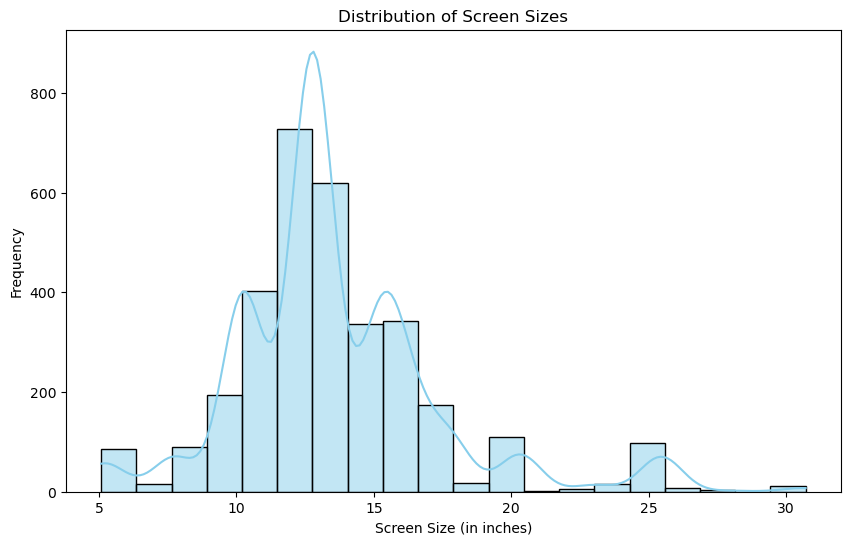

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['screen_size'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (in inches)')
plt.ylabel('Frequency')
plt.show()

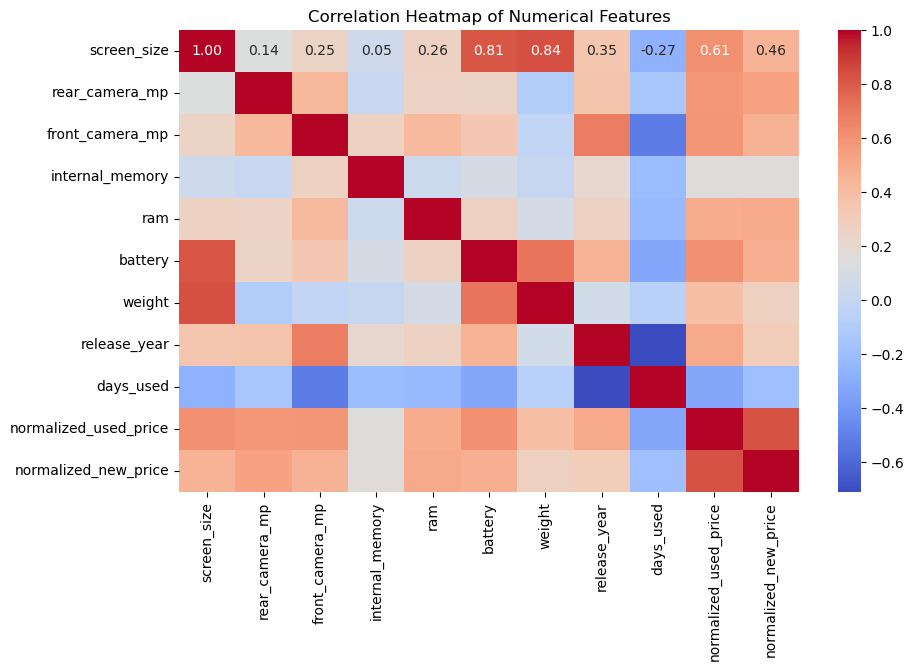

In [10]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

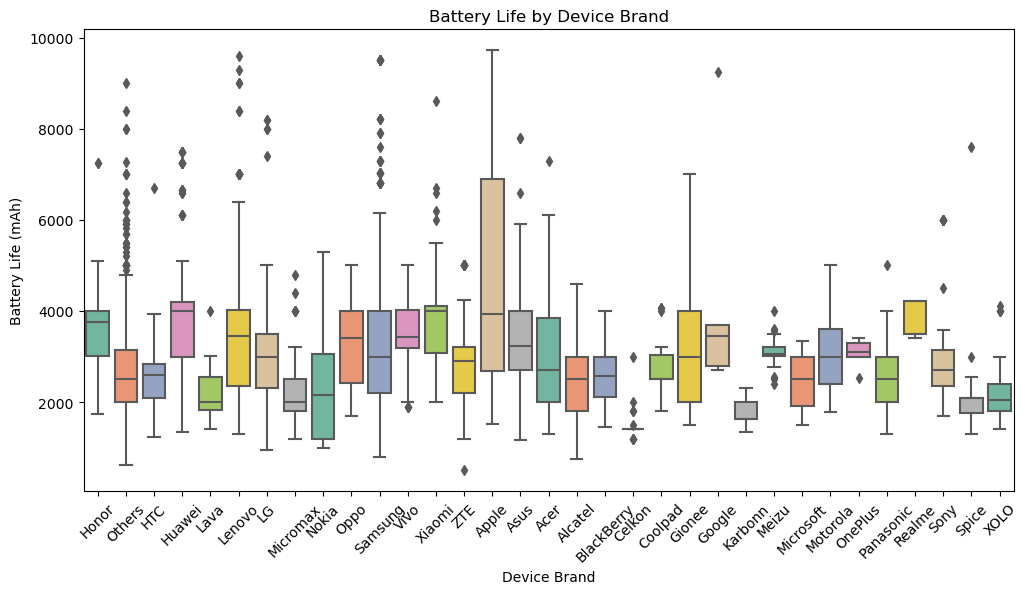

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='device_brand', y='battery', data=df, palette="Set2")
plt.title('Battery Life by Device Brand')
plt.xlabel('Device Brand')
plt.ylabel('Battery Life (mAh)')
plt.xticks(rotation=45)
plt.show()


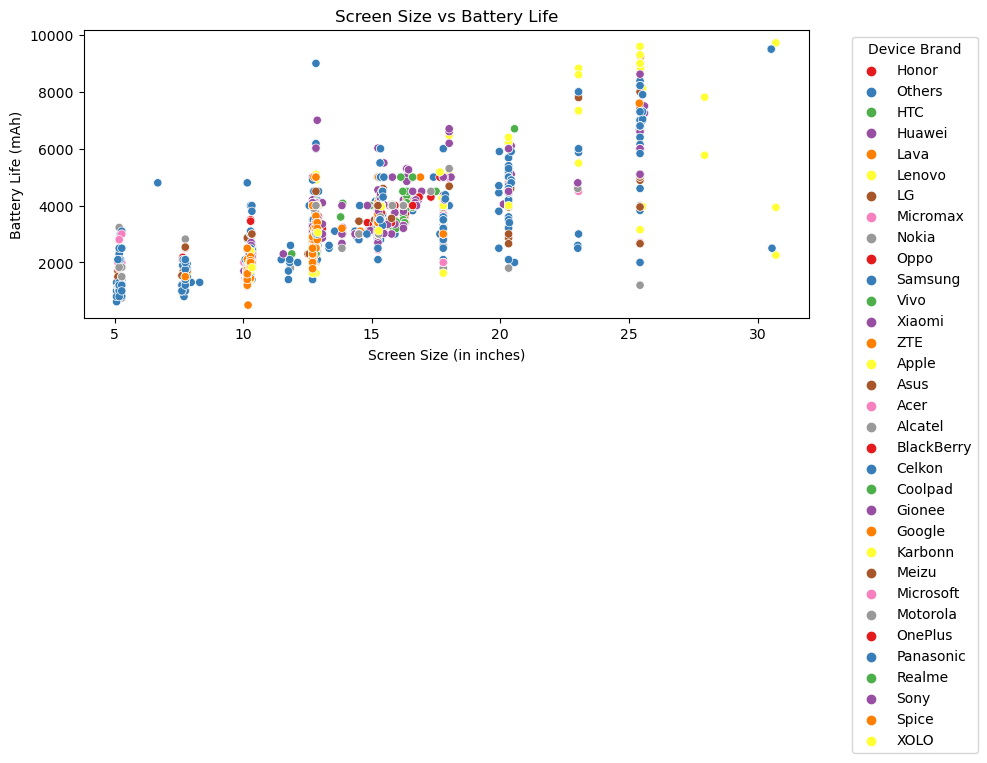

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='screen_size', y='battery', data=df, hue='device_brand', palette='Set1')
plt.title('Screen Size vs Battery Life')
plt.xlabel('Screen Size (in inches)')
plt.ylabel('Battery Life (mAh)')
plt.legend(title='Device Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [14]:
label_encoder = LabelEncoder()

In [15]:
df['os_encoded'] = label_encoder.fit_transform(df['os'])   

In [16]:
df['4g_encoded'] = label_encoder.fit_transform(df['4g']) 

In [17]:
df['5g_encoded'] = label_encoder.fit_transform(df['5g'])

In [18]:
df_onehot = pd.get_dummies(df[['device_brand']], drop_first=True)

In [19]:
df = pd.concat([df, df_onehot], axis=1)


In [20]:
scaler_std = StandardScaler()

In [21]:
std_scaled = scaler_std.fit_transform(df[['screen_size', 'battery', 'ram']])


In [22]:
df[['screen_std', 'battery_std', 'ram_std']] = std_scaled

In [23]:
scaler_mm = MinMaxScaler()

In [24]:
mm_scaled = scaler_mm.fit_transform(df[['screen_size', 'battery', 'ram']])

In [61]:
df[['screen_mm', 'battery_mm', 'ram_mm']] = mm_scaled


In [62]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
X = df_encoded.drop(["normalized_used_price", "normalized_new_price"], axis=1)
y = df_encoded["normalized_used_price"]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\nKNN Regressor:")
print("R² Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))



KNN Regressor:
R² Score: 0.7491102163701814
MAE: 0.2402648118356375
MSE: 0.09716708448467351


# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression:
R² Score: 0.7748079895819309
MAE: 0.21662608197116925
MSE: 0.08721459592731454


# SVM

In [71]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print("\nSupport Vector Regressor:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))



Support Vector Regressor:
R² Score: 0.7960308392003385
MAE: 0.20727592899705324
MSE: 0.078995200174955


# Decisison Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("\nDecision Tree Regressor:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor:
R² Score: 0.6590875850656439
MAE: 0.2725450306651306
MSE: 0.13203194225188705


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regressor:
R² Score: 0.8133946649159607
MAE: 0.19963999306721975
MSE: 0.07227036548508807


# Ada Boost

In [74]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
print("\nAdaBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_ada))
print("MAE:", mean_absolute_error(y_test, y_pred_ada))
print("MSE:", mean_squared_error(y_test, y_pred_ada))


AdaBoost Regressor:
R² Score: 0.7179706493253684
MAE: 0.25127054835419466
MSE: 0.10922712494580249


# Gradient Boost

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("\nGradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))



Gradient Boosting Regressor:
R² Score: 0.8071502484192696
MAE: 0.1958515460567656
MSE: 0.07468876505685665


# Observation

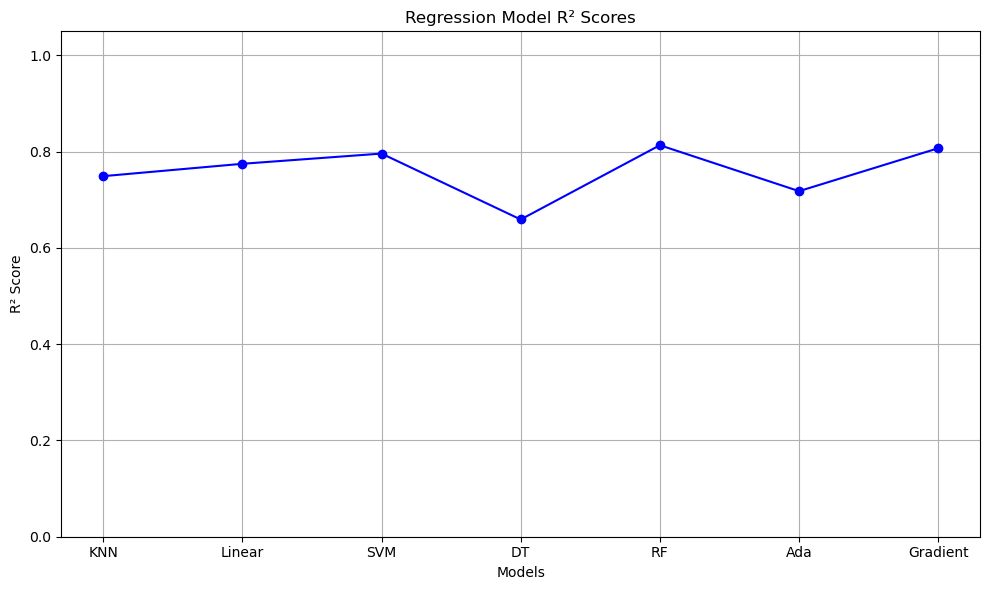

In [76]:
models = ['KNN', 'Linear', 'SVM', 'DT', 'RF', 'Ada', 'Gradient']
r2_scores = [
    r2_score(y_test, y_pred_knn),         
    r2_score(y_test, y_pred_lr),          
    r2_score(y_test, y_pred_svr),        
    r2_score(y_test, y_pred_dt),         
    r2_score(y_test, y_pred_rf),          
    r2_score(y_test, y_pred_ada),     
    r2_score(y_test, y_pred_gb),          
]
plt.figure(figsize=(10, 6))
plt.plot(models, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Regression Model R² Scores')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()
